In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (15, 15)

## Adding Transparent (PNG) Logo to an Image

### Read ad Display the Images

Desert image size: (1064, 1600, 3)
Logo size: (2436, 2623, 4)


Text(0.5, 1.0, 'Transparent Logo')

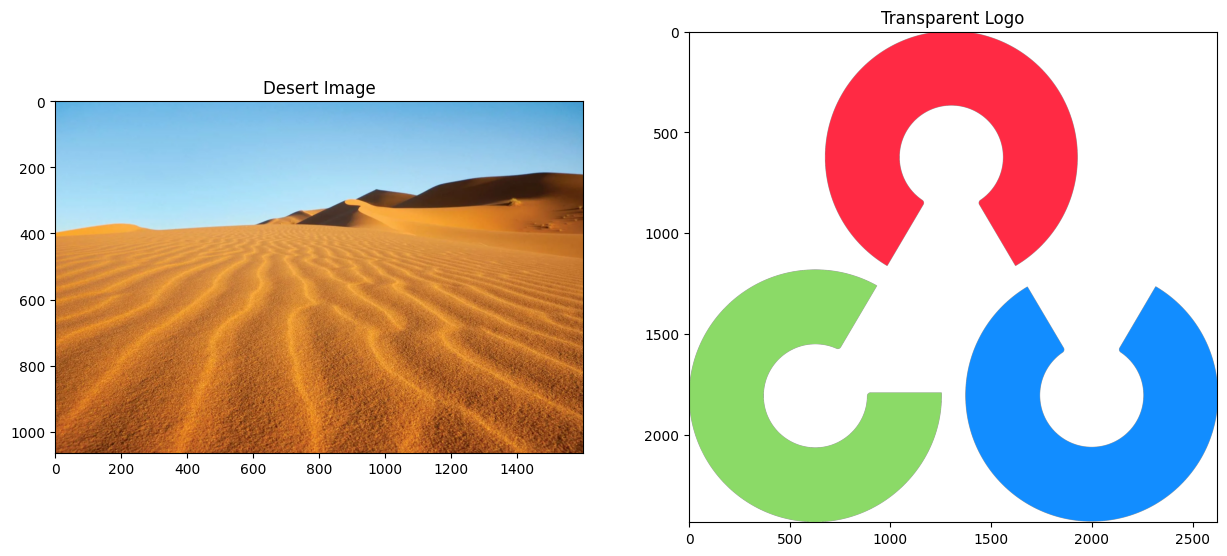

In [2]:
img = cv2.imread('Desert.jpg', cv2.IMREAD_UNCHANGED)
logo = cv2.imread('opencv_logo.png', cv2.IMREAD_UNCHANGED)

print('Desert image size:', img.shape)
print('Logo size:', logo.shape)

logo_rgba = cv2.cvtColor(logo, cv2.COLOR_BGRA2RGBA)

plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title('Desert Image')
plt.subplot(122); plt.imshow(logo_rgba); plt.title('Transparent Logo')


### Reduce the size of the OpenCV Logo

In [ ]:
# Resize the logo to 10% of its original dimensions.
logo = cv2.resize(logo, None, fx=0.1, fy=0.1, interpolation = cv2.INTER_LINEAR)

img_h, img_w, _ = img.shape
logo_h, logo_w, _ = logo.shape

print(logo.shape)

(244, 262, 4)


### Separate the Color and Alpha Channels

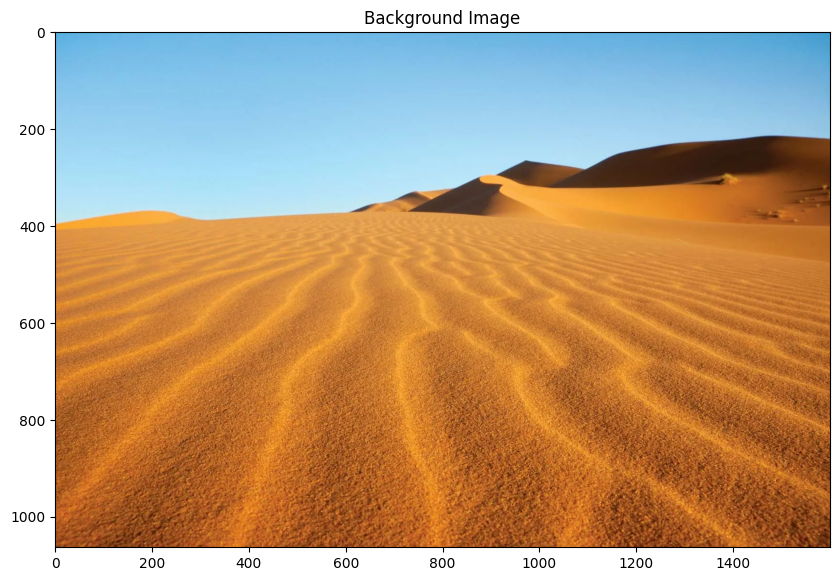

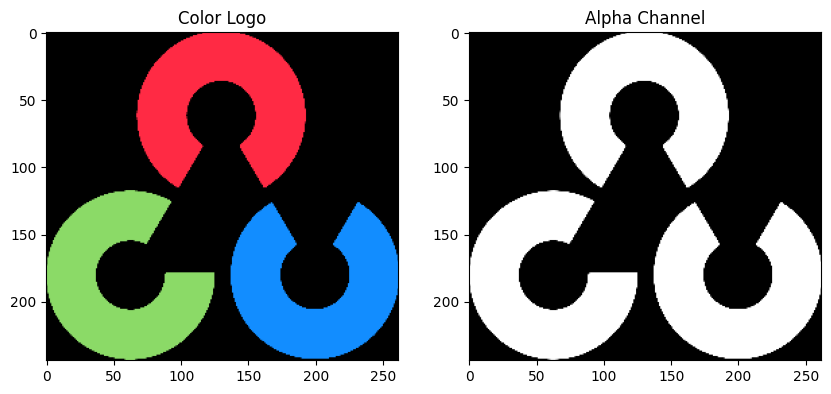

In [ ]:
logo_bgr = logo[:, :, 0:3] # Color channels
logo_alpha = logo[:, :, 3] # Alpha channel

plt.figure(figsize = (10, 10))
plt.imshow(img[:, : , :: -1]); plt.title('Background Image')

plt.figure(figsize = (10, 5))
plt.subplot(121); plt.imshow(logo_bgr[:, :, ::-1]); plt.title('Color Logo');
plt.subplot(122); plt.imshow(logo_alpha); plt.title('Alpha Channel');


### Region of Interest (ROI)

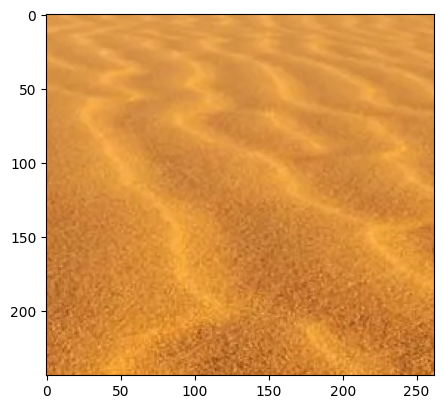

In [7]:
cx = int(img_w/2)
cy = int(img_h/2)

tlc_x = int(cx - logo_w/2)
tlc_y = int(cy - logo_h/2)

brc_x = int(cx + logo_w/2)
brc_y = int(cy + logo_h/2)

roi = img[tlc_y:brc_y, tlc_x:brc_x]

plt.figure(figsize = (5,5))
plt.imshow(roi[:, :, ::-1]);


### ROI Masked Outputs

<Figure size 1500x1000 with 0 Axes>

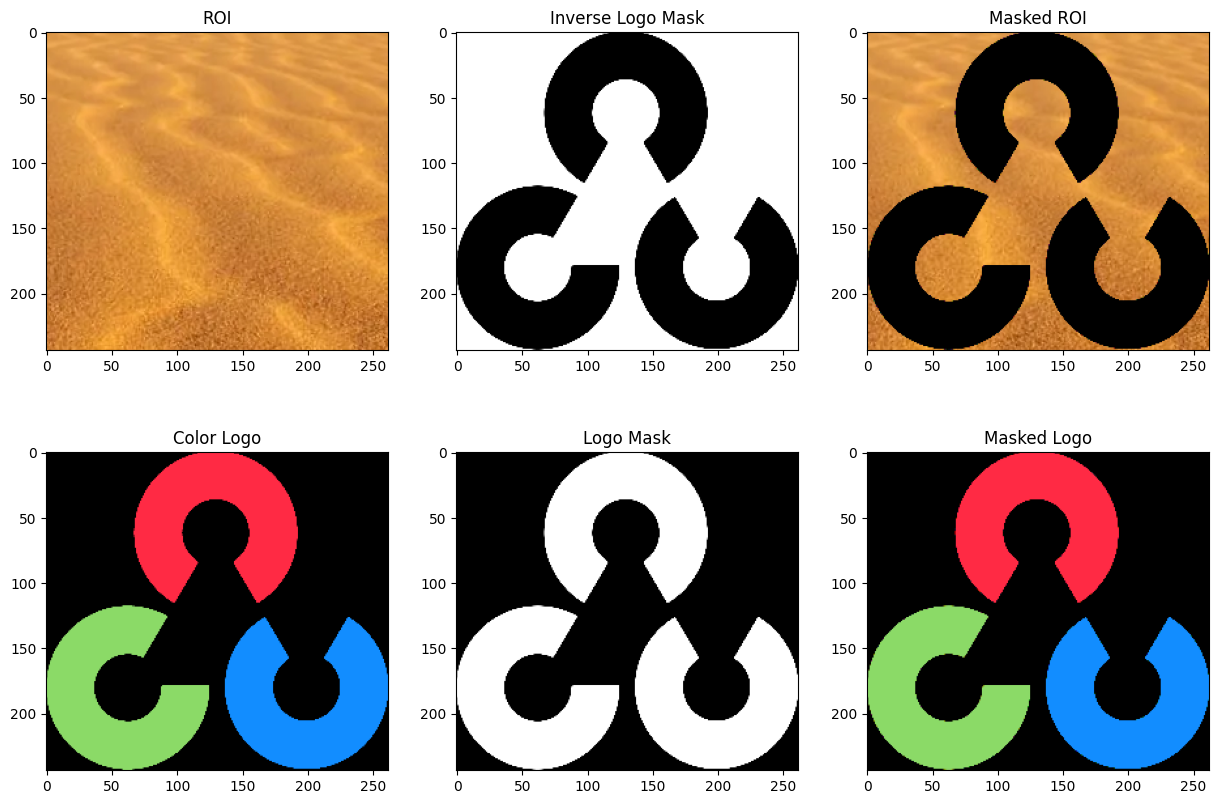

In [8]:
logo_mask = cv2.merge([logo_alpha, logo_alpha, logo_alpha])

logo_mask_inv = cv2.bitwise_not(logo_mask)

masked_roi = cv2.bitwise_and(roi, logo_mask_inv)

masked_logo = cv2.bitwise_and(logo_bgr, logo_mask)

plt.figure(figsize = [15, 10])

plt.figure(figsize=[15, 10])

plt.subplot(231); plt.imshow(roi[:,:,::-1]); plt.title('ROI');
plt.subplot(232); plt.imshow(logo_mask_inv[:,:, ::-1]); plt.title('Inverse Logo Mask');
plt.subplot(233); plt.imshow(masked_roi[:,:,::-1]); plt.title('Masked ROI');

plt.subplot(234); plt.imshow(logo_bgr[:,:,::-1]); plt.title('Color Logo');
plt.subplot(235); plt.imshow(logo_mask[:,:,::-1]); plt.title('Logo Mask');
plt.subplot(236); plt.imshow(masked_logo[:,:,::-1]); plt.title('Masked Logo');

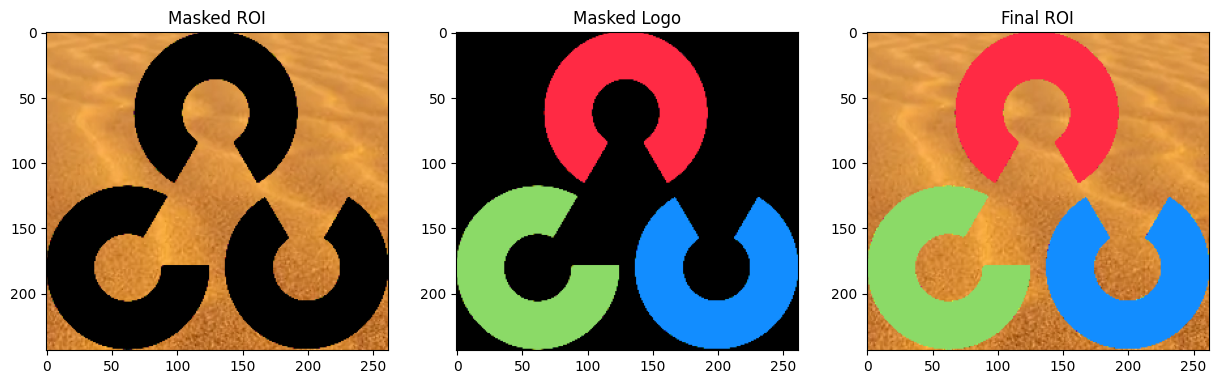

In [9]:
roi_final = cv2.bitwise_or(masked_roi, masked_logo)

plt.figure(figsize=[15,10])

plt.subplot(131); plt.imshow(masked_roi[:,:,::-1]); plt.title('Masked ROI');
plt.subplot(132); plt.imshow(masked_logo[:,:,::-1]); plt.title('Masked Logo');
plt.subplot(133); plt.imshow(roi_final[:, :, ::-1]); plt.title('Final ROI');

### ROI Patch to the Image

In [10]:
roi_1 = roi.copy()
img_1 = img.copy()

True

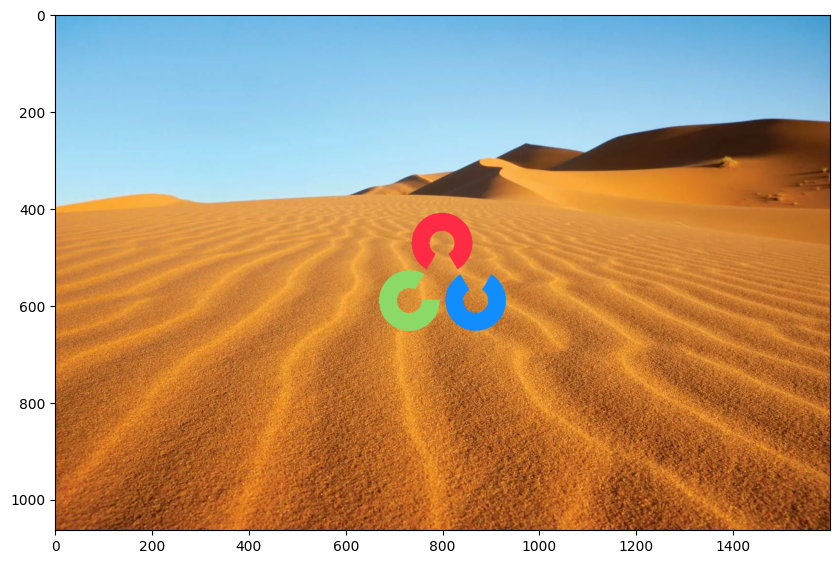

In [11]:
img_1[tlc_y:brc_y, tlc_x:brc_x] = roi_final

plt.figure(figsize=(10,10))
plt.imshow(img_1[:,:,::-1])

cv2.imwrite('watermarked_v1.jpg', img_1)

## Watermarking

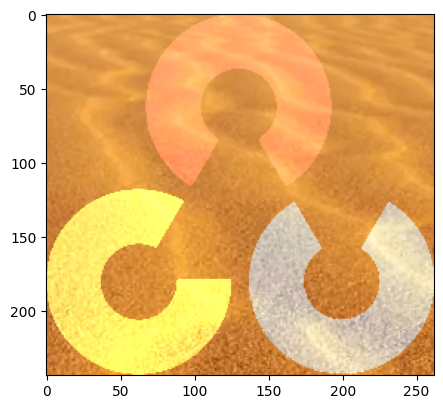

In [28]:
roi_2 = roi.copy()

watermarked = cv2.addWeighted(roi_2, 1, logo_bgr, 0.5, 0)

plt.figure(figsize = (5,5))
plt.imshow(watermarked[:,:,::-1])

True

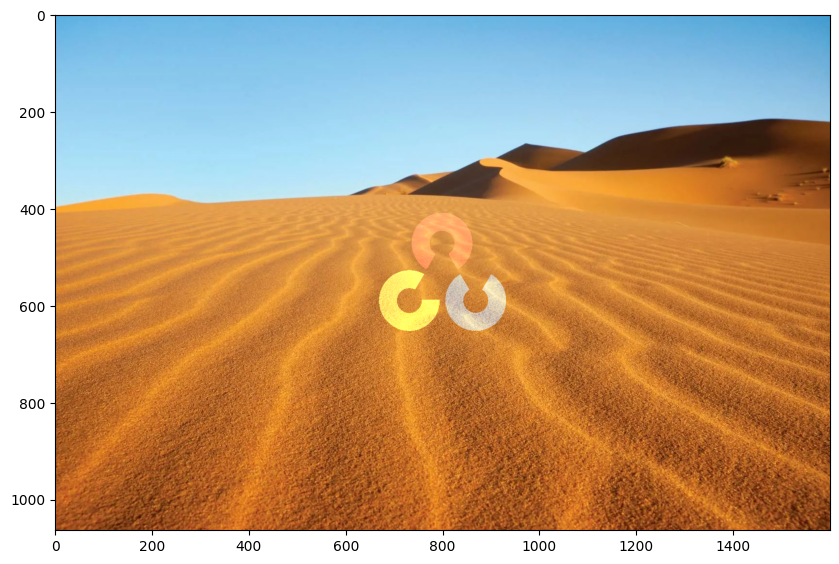

In [29]:
img_2 = img.copy()

img_2[tlc_y:brc_y, tlc_x:brc_x] = watermarked

plt.figure(figsize = (10,10))
plt.imshow(img_2[:,:,::-1]);

cv2.imwrite('watermarked_v2.jpg', img_2)